In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:\syntax code\python\jupytr\dataset\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= 0.2,stratify=y,random_state=2)

In [10]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [35]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(8,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(8,activation='sigmoid')
])

In [36]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [44]:
history=model.fit(X_train_std,y_train, validation_split=0.1,epochs=30)

Epoch 1/30
 1/18 [>.............................] - ETA: 0s - loss: 0.5590 - accuracy: 0.6250

18/18 [==============================] - 0s 8ms/step - loss: 0.4626 - accuracy: 0.7681 - val_loss: 0.4640 - val_accuracy: 0.8065
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.7663 - val_loss: 0.4644 - val_accuracy: 0.8065
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7681 - val_loss: 0.4629 - val_accuracy: 0.8065
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7681 - val_loss: 0.4602 - val_accuracy: 0.8065
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7681 - val_loss: 0.4590 - val_accuracy: 0.8065
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7663 - val_loss: 0.4596 - val_accuracy: 0.8065
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.7681 - val_loss: 0.4569 - val_accuracy: 0.8065
Epoch 8/30
18/18 [=============

In [38]:
y_pred = (y_test == 'Yes').astype(int) # Ambang batas 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



In [39]:
loss,accuracy=model.evaluate(X_test_std,y_test)
print(accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.6688
0.6688311696052551


In [40]:
print(X_test_std.shape)
print(X_test_std[0])

(154, 8)
[-0.24864315 -0.48940393  0.12781322 -1.29075209 -0.70188945 -0.79714106
 -0.78484458 -0.53298848]


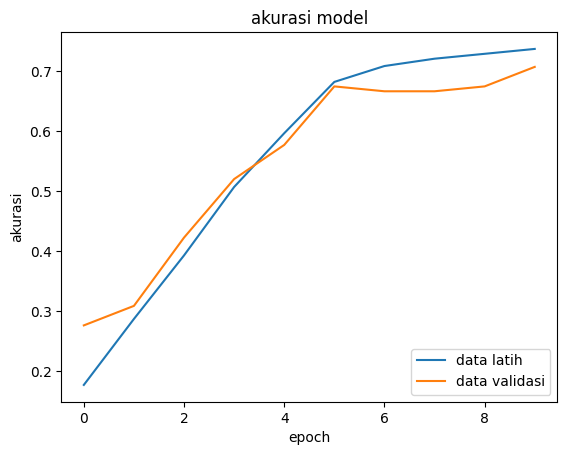

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('akurasi model')
plt.ylabel('akurasi')
plt.xlabel('epoch')

plt.legend(['data latih','data validasi'],loc='lower right')

In [42]:
y_predict=model.predict(X_test_std)

5/5 [==============================] - 0s 2ms/step
